# Profile Plotting for each Mechanims
This notebook is part of the SVM mechanism prediction [Main notebook](MAIN%20-%20SVM.ipynb)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from pandasql import sqldf
from scripts.profile_reader import ProfileReader

pd.options.display.max_rows = 500
pd.options.display.max_columns = 300
%matplotlib inline

pqry = lambda q: sqldf(q, globals())

In [4]:
pr = ProfileReader(data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',  
                       mechanism_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')
# read in data. Make column 2-level index, level 0 is system, level 1 ir readout
# row indices are mechanism, agent, concentration
data = pr.parse_profiles(keep_column_names=False)

# Impute missing
grouped = data.groupby(data.index.get_level_values(0).values)
f = lambda x: x.fillna(x.mean())
data = grouped.transform(f)

#data.columns = [':'.join(col).strip() for col in data.columns.values]

## Plot each mechanism class 

AhR agonist


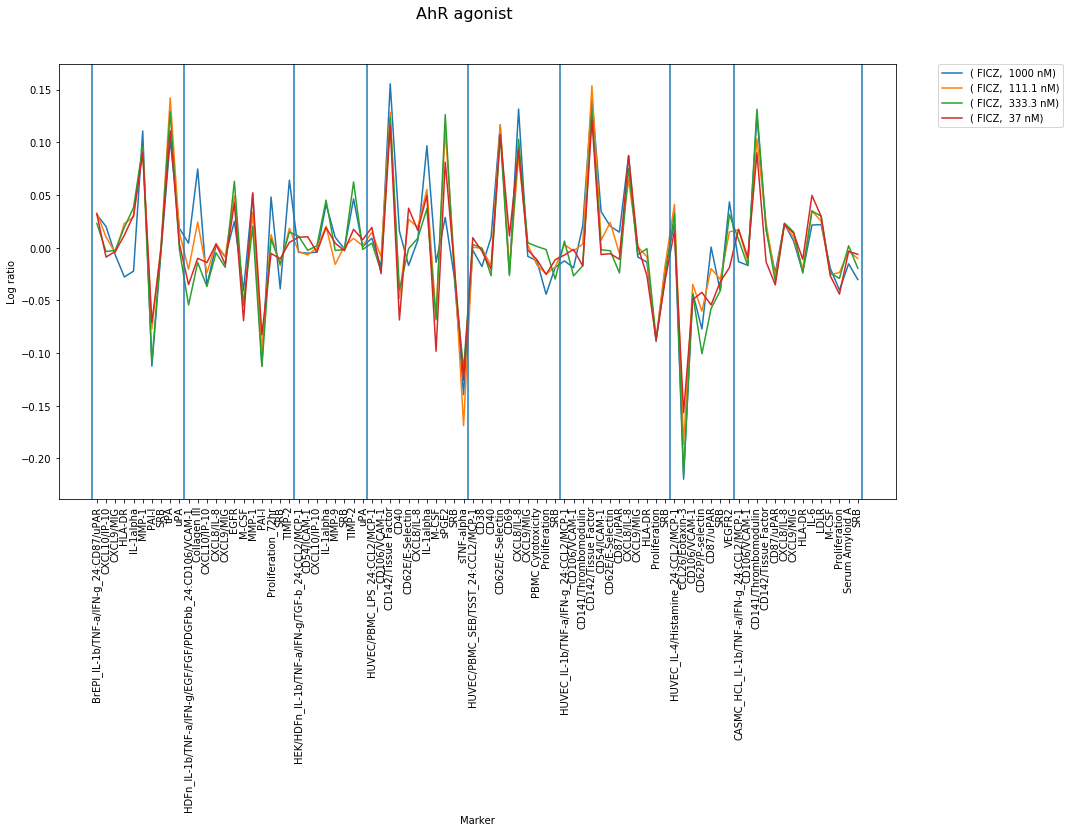

Calcineurin inhibitor


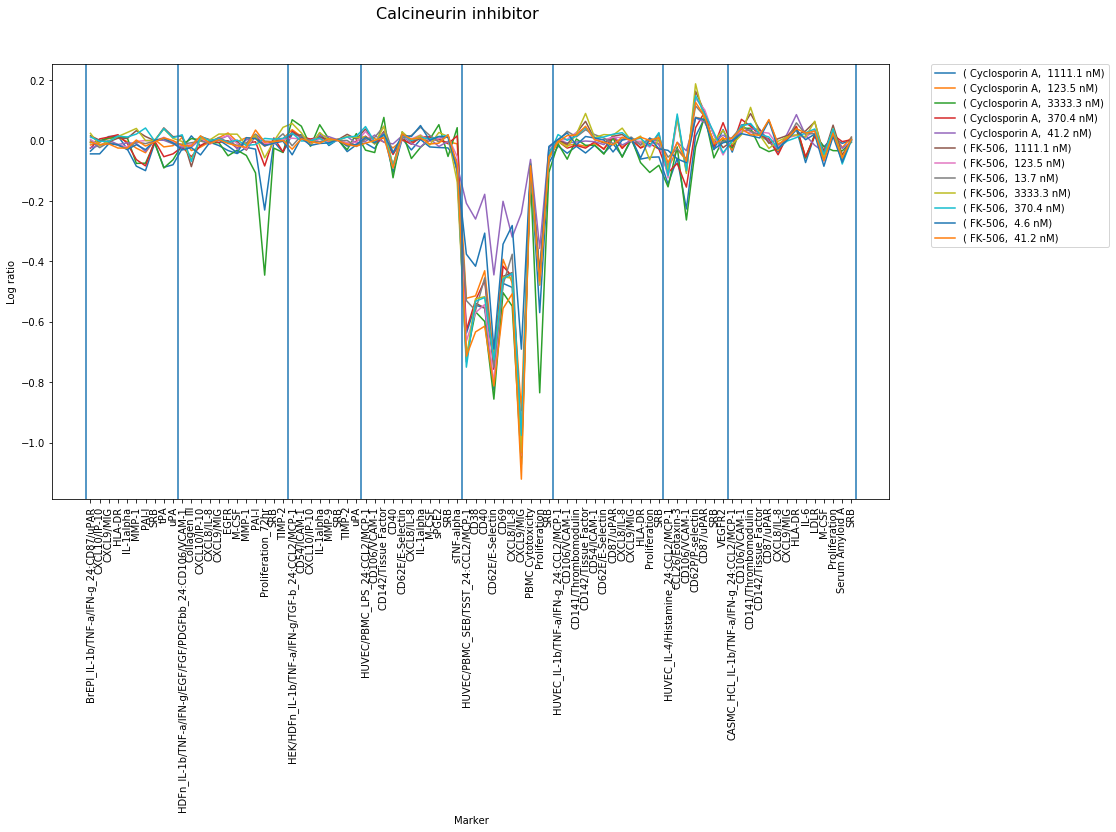

EGFR inhibitor


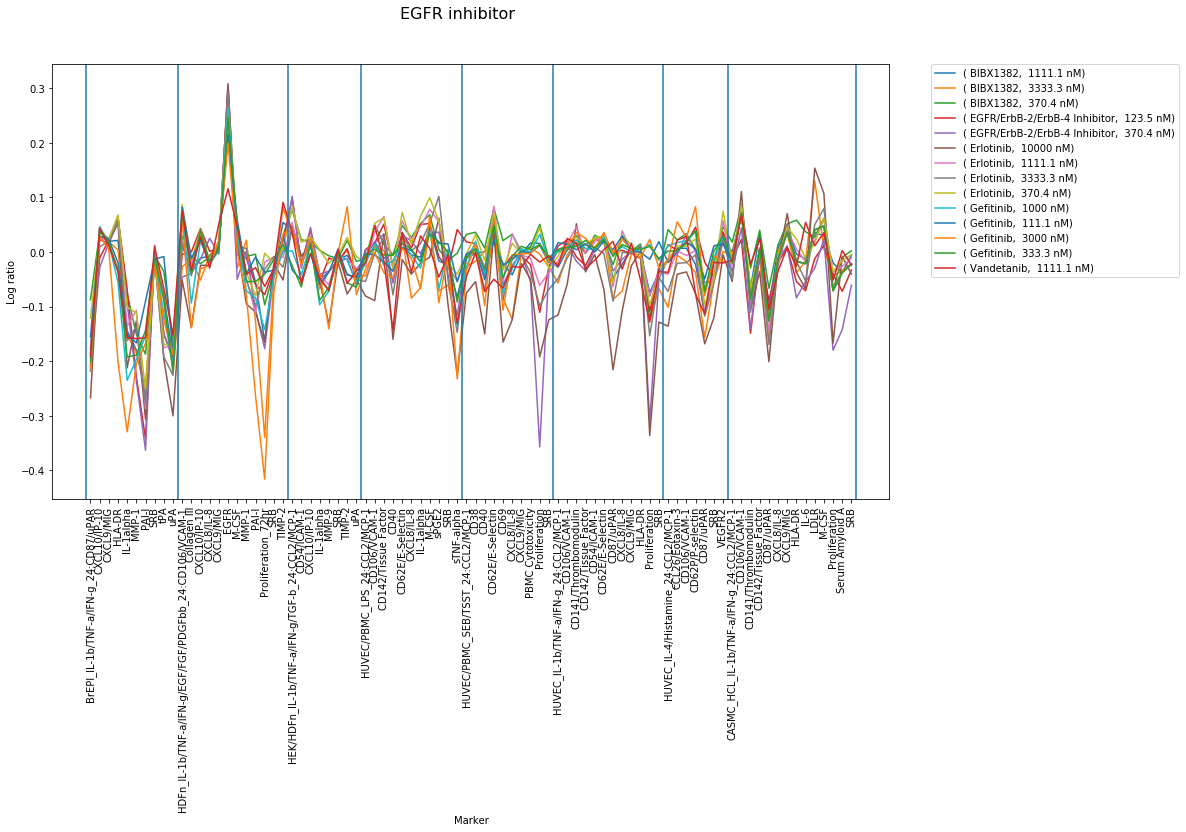

SR Ca++ ATPase inhibitor


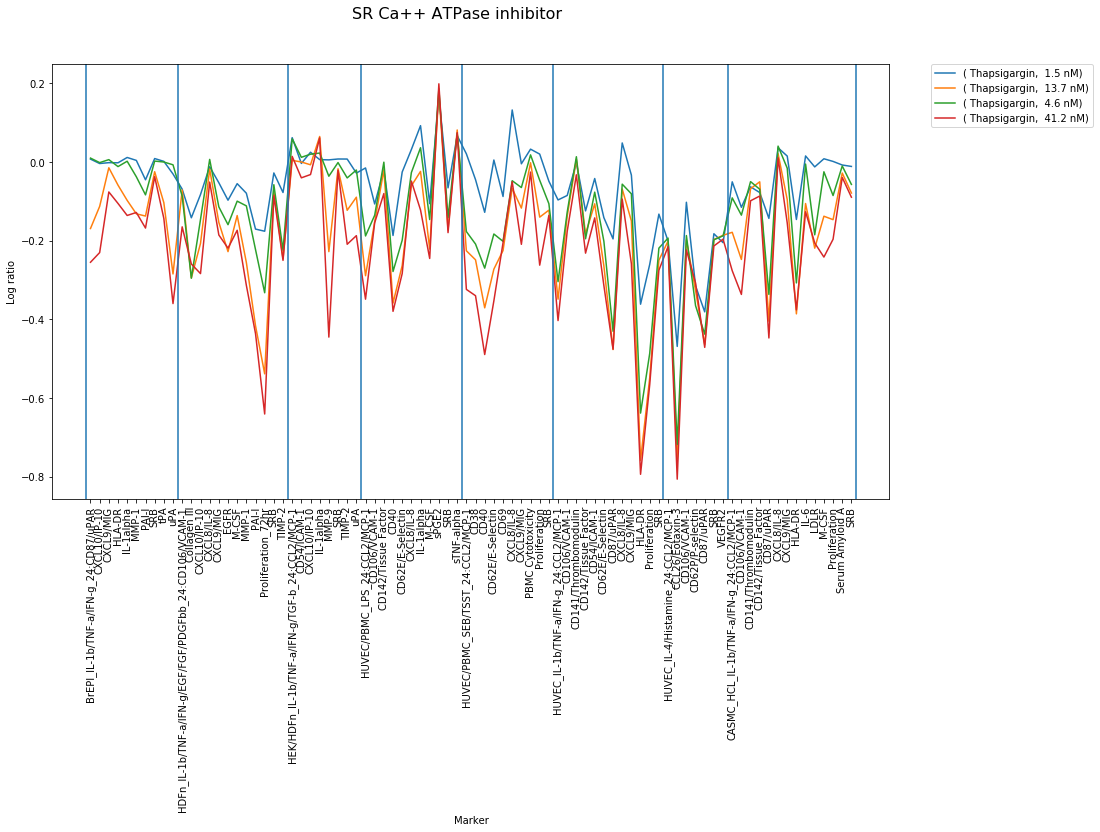

EP agonist


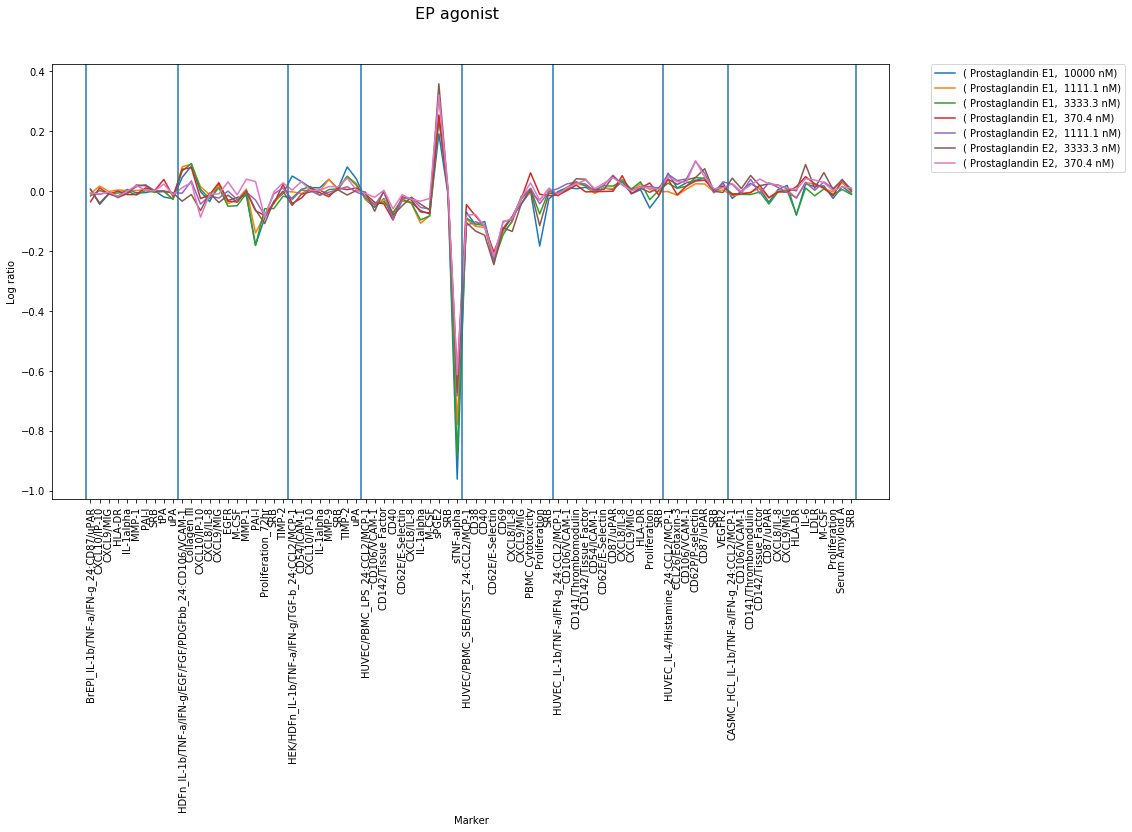

ER agonist


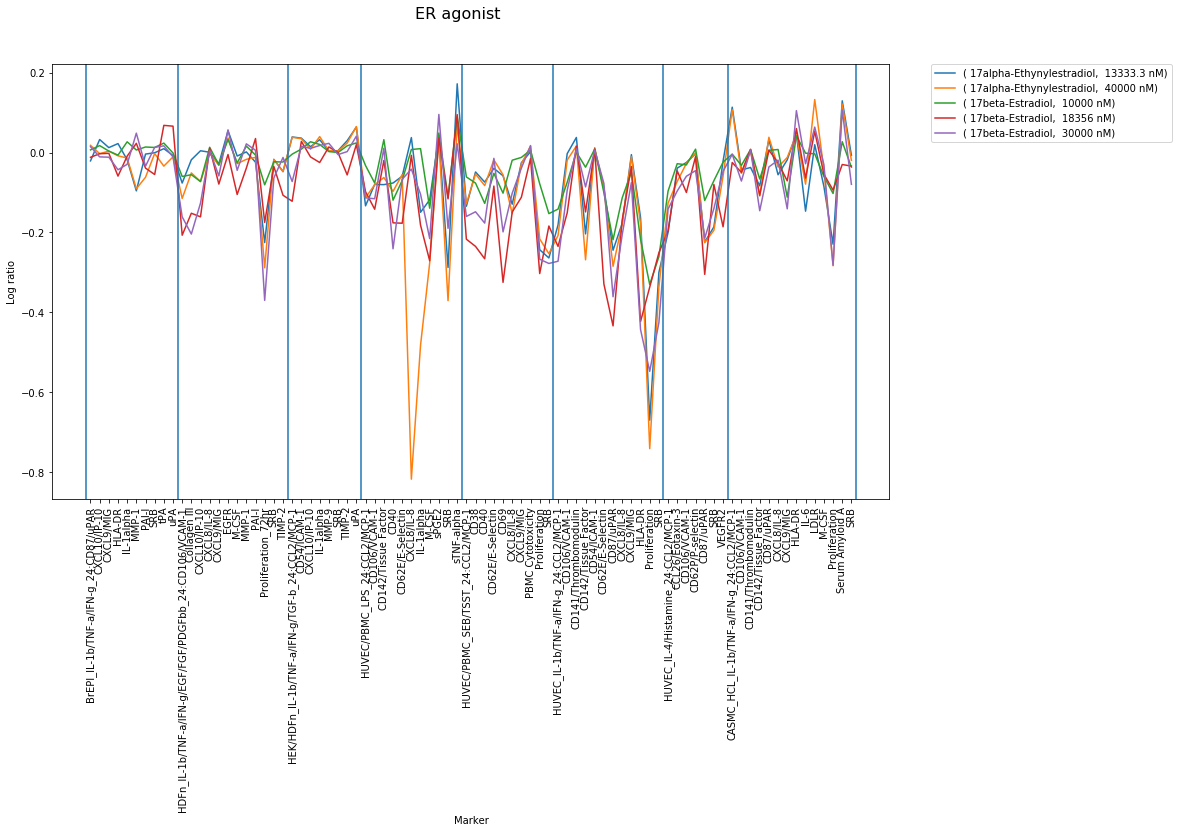

GR agonist


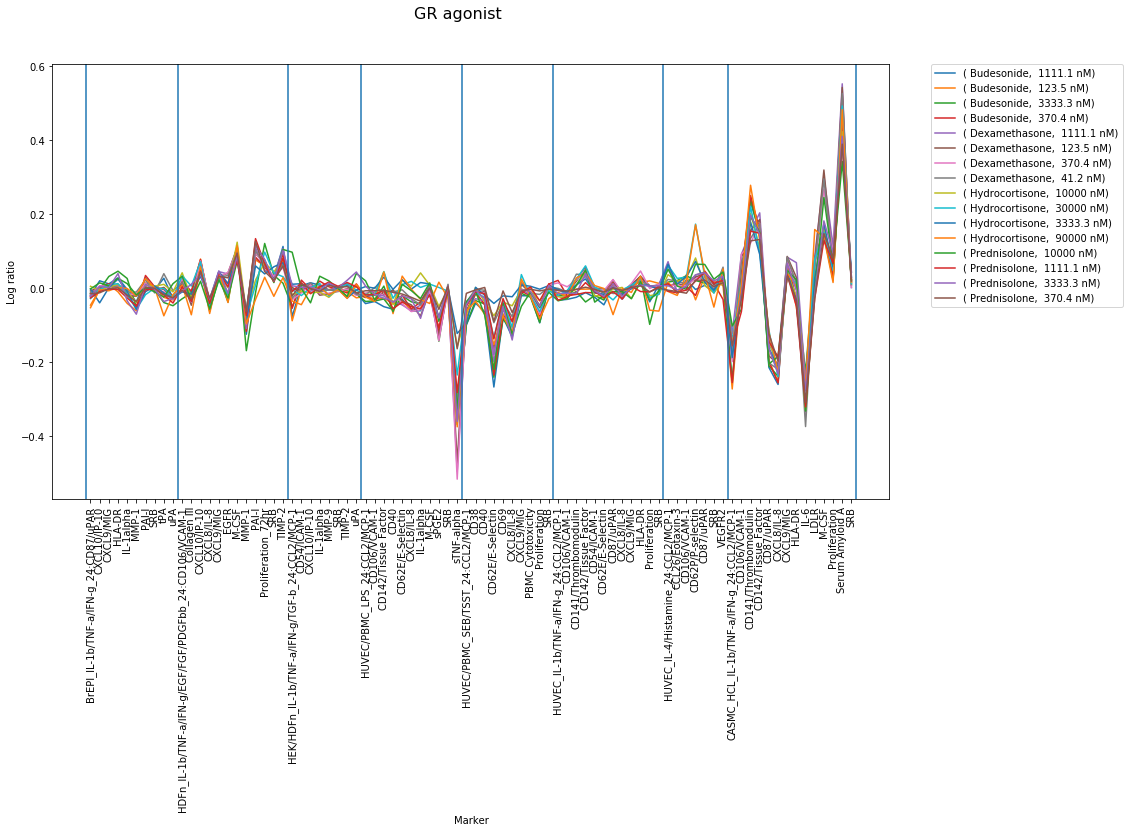

H1 antagonist


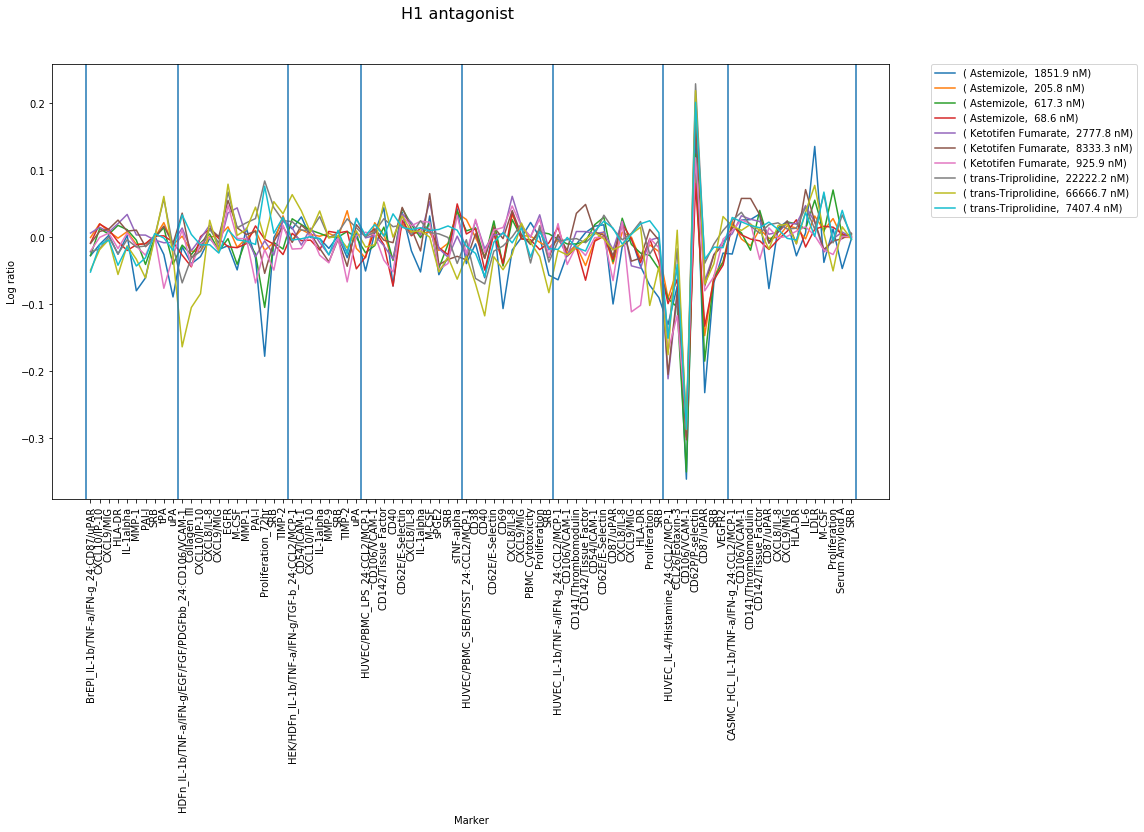

HDAC inhibitor


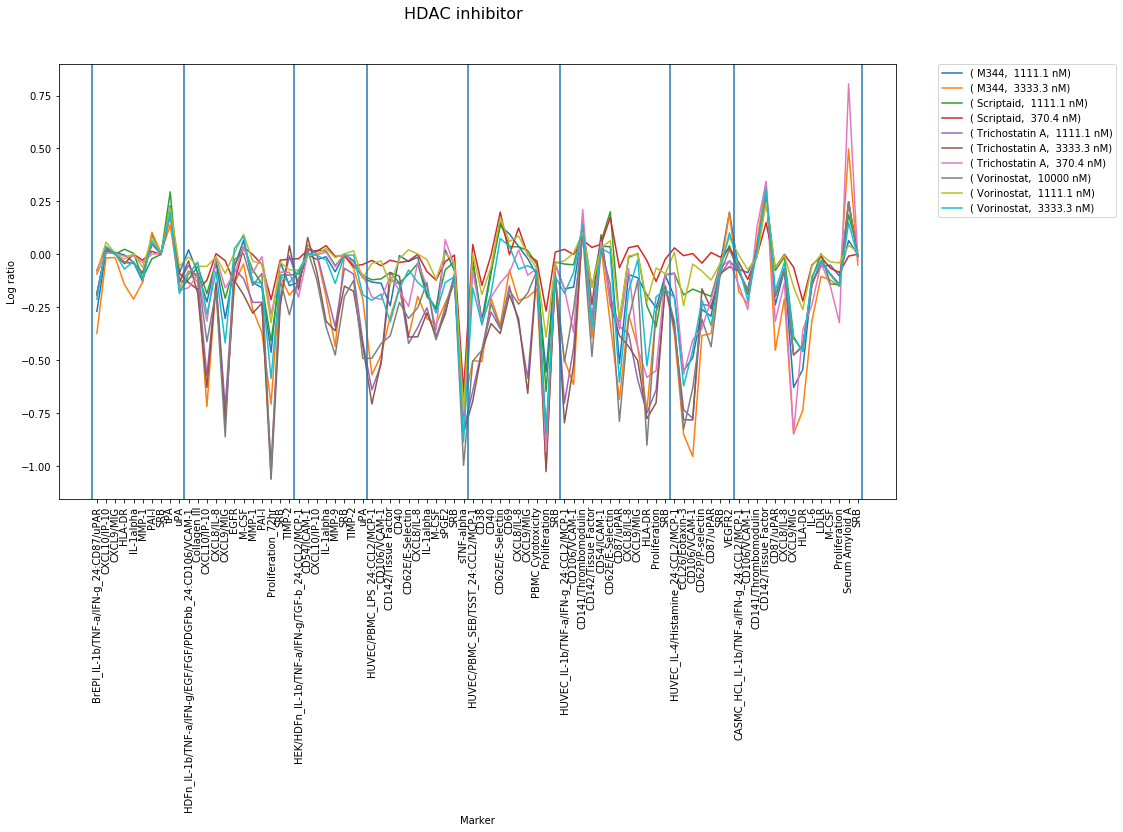

HMG-CoA reductase inhibitor


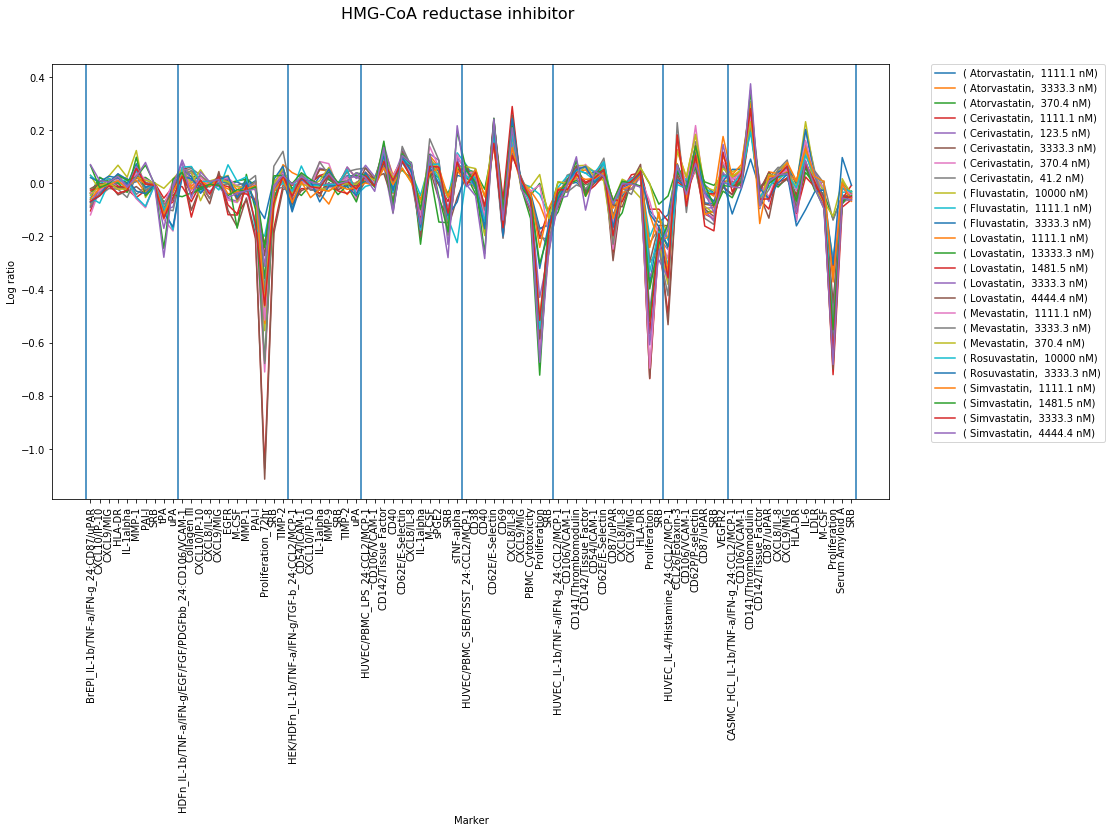

Hsp90 inhibitor


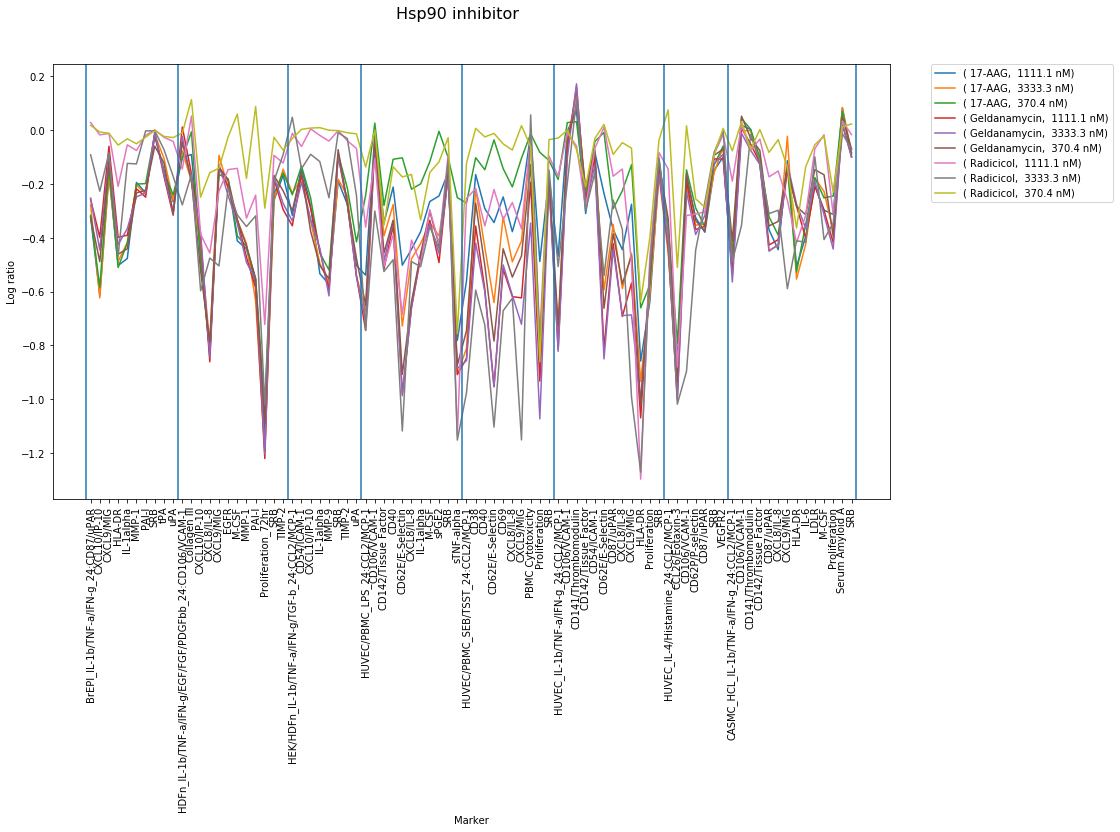

IKK2 inhibitor


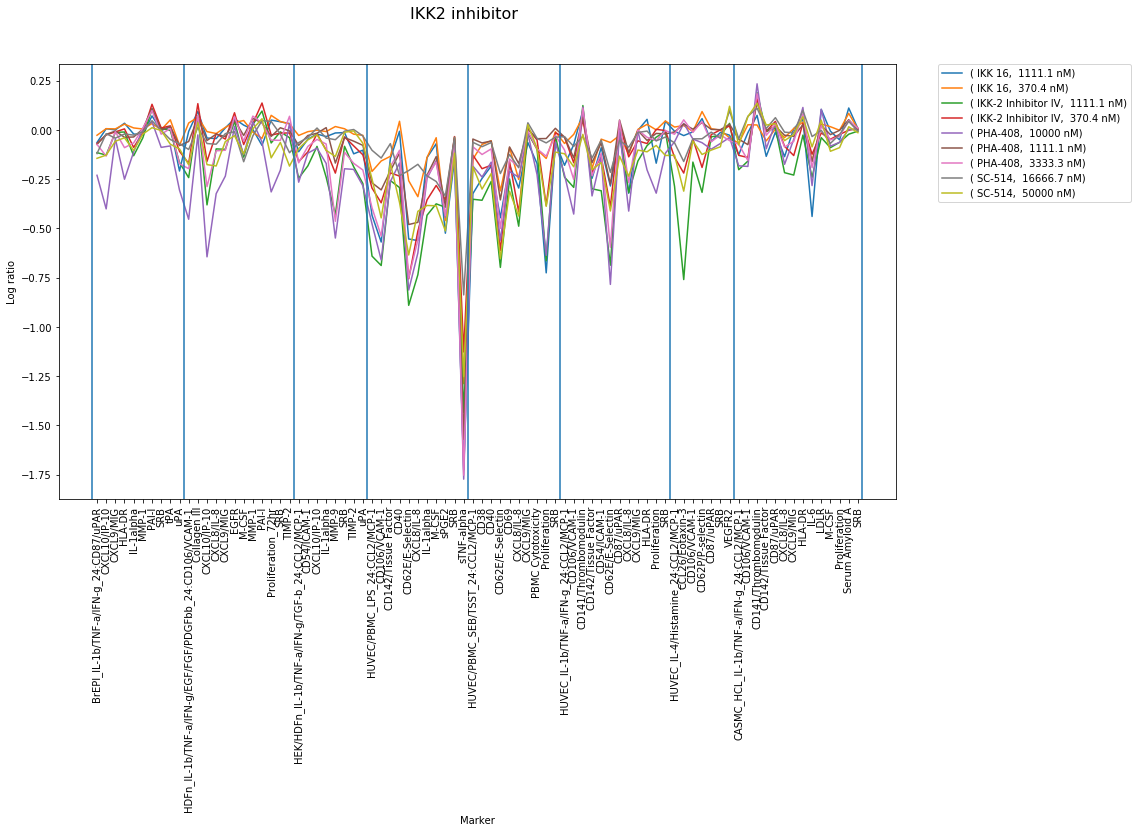

IL-17R agonist


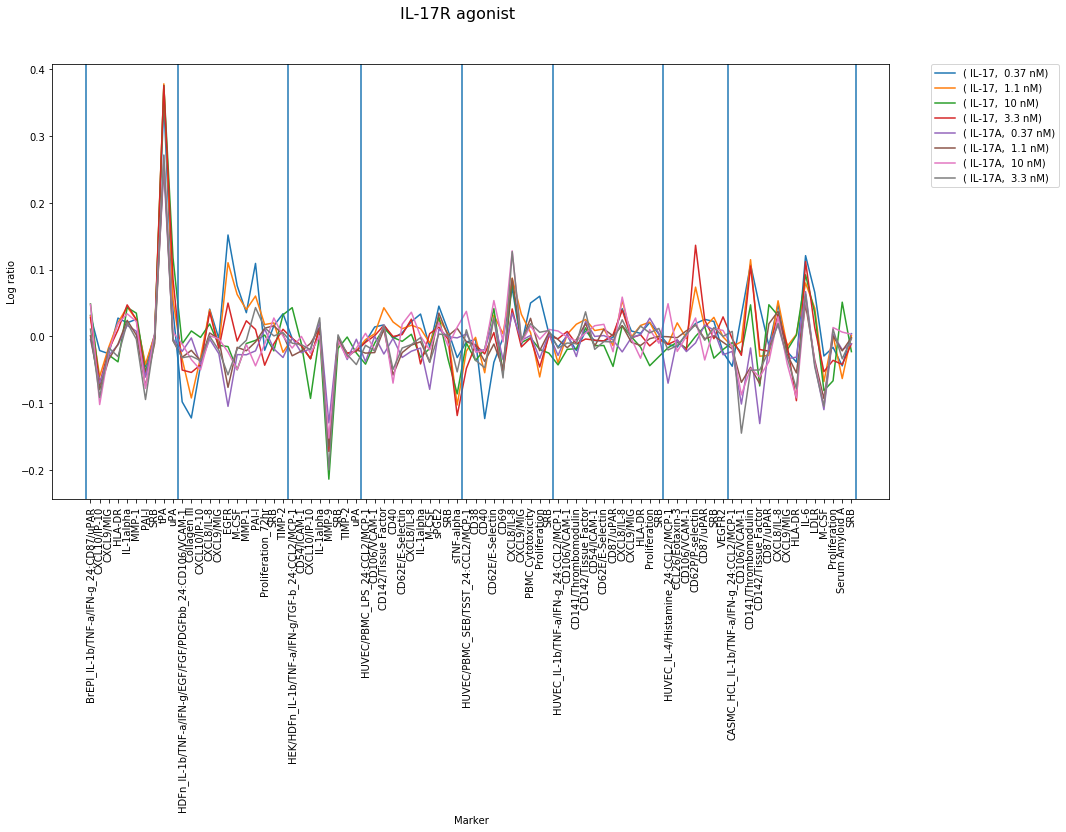

JAK inhibitor


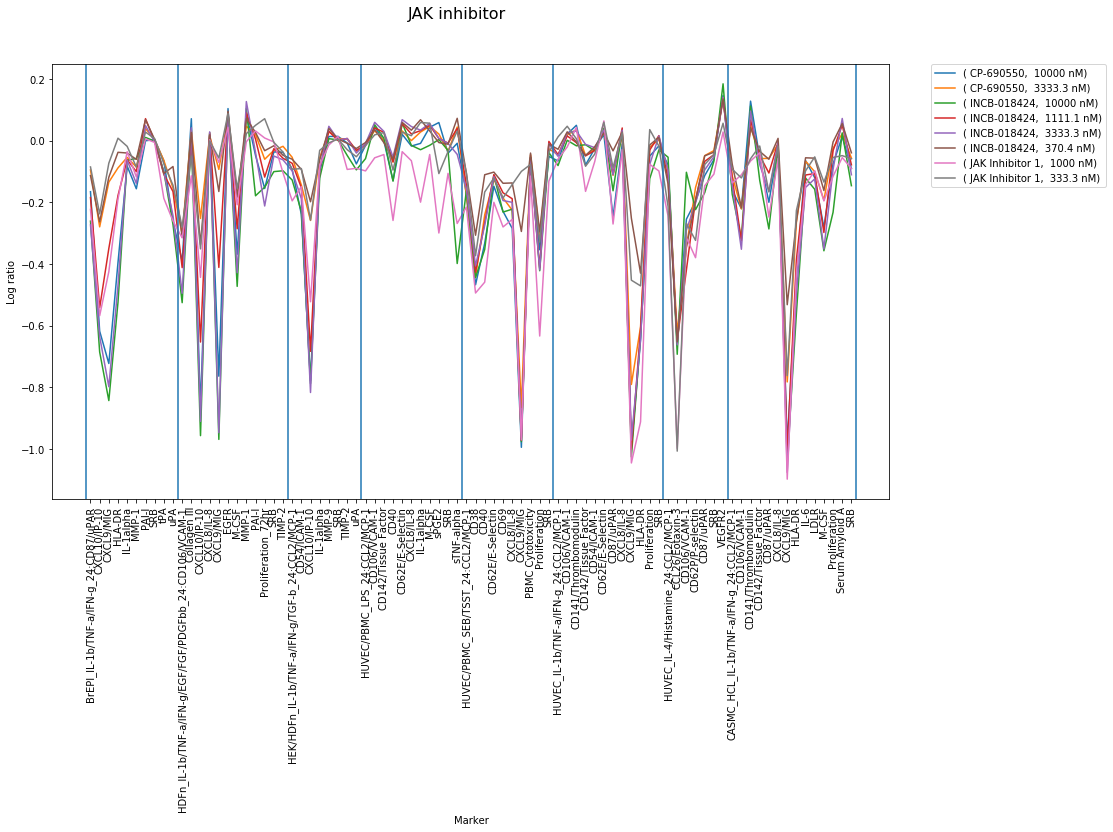

MEK inhibitor


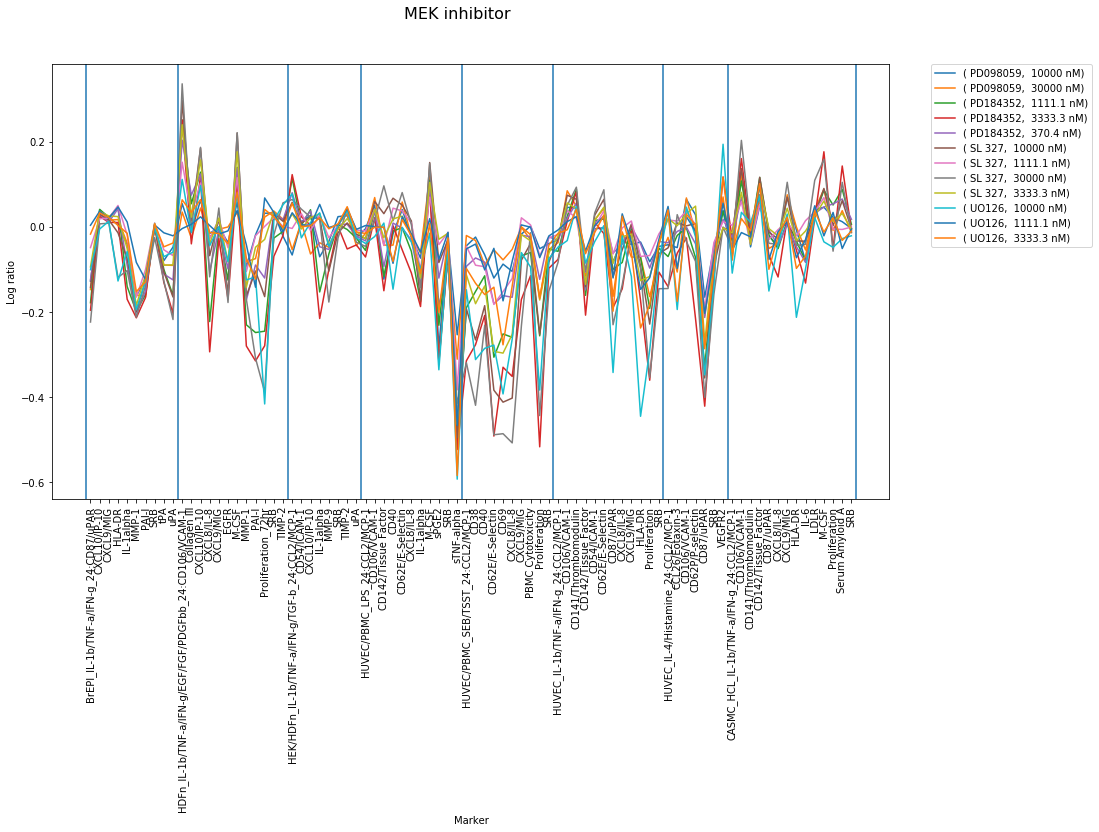

Microtubule disruptor


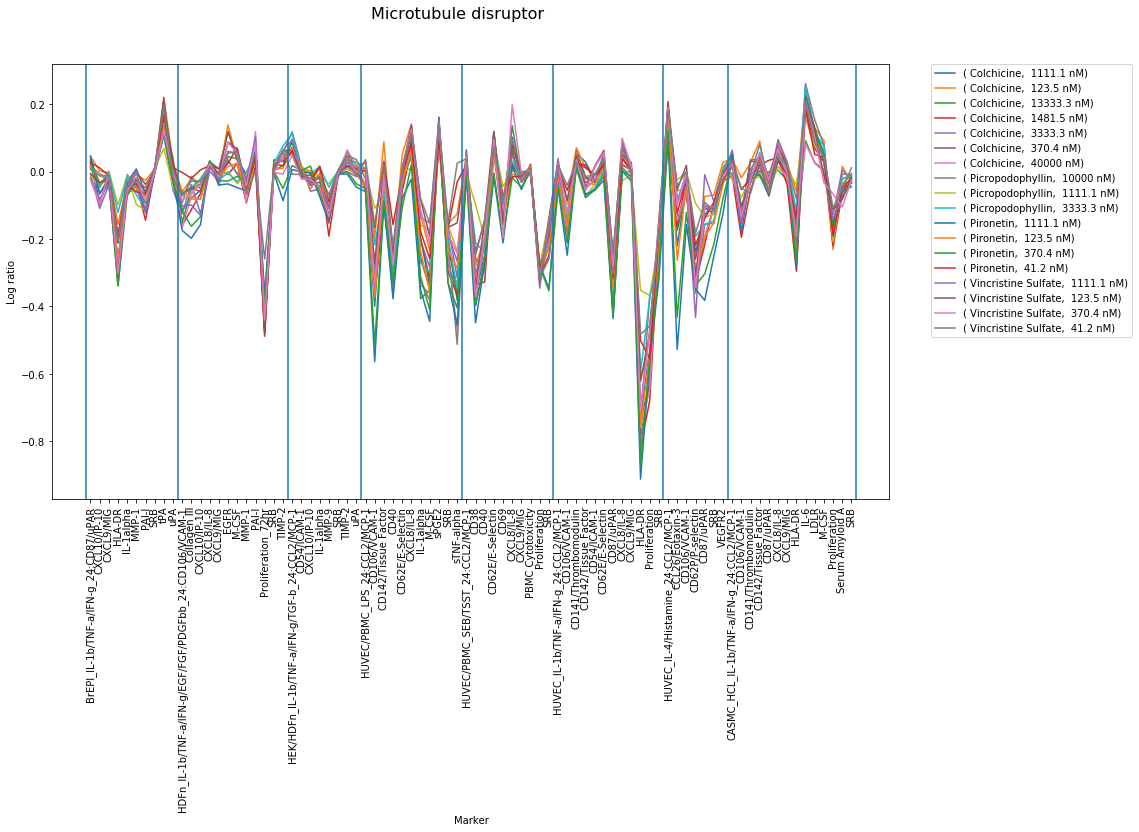

Microtubule stabilizer


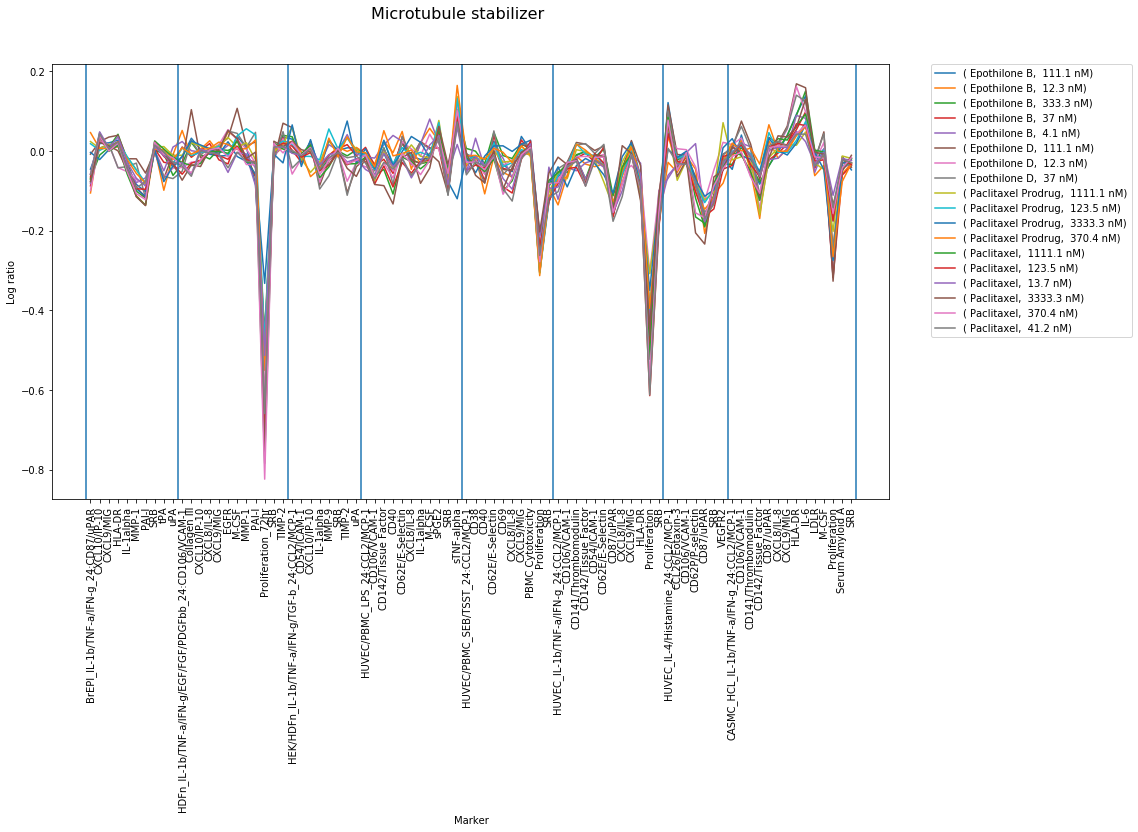

Mitochondrial inhibitor


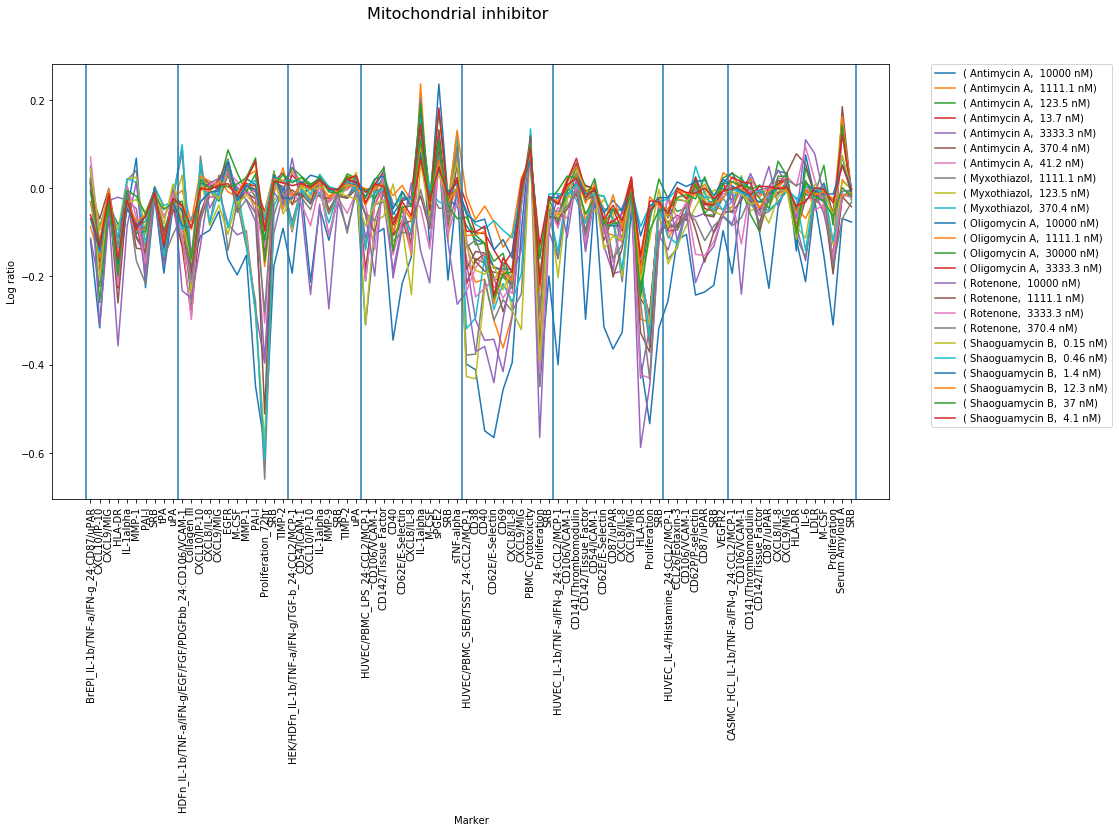

mTOR inhibitor


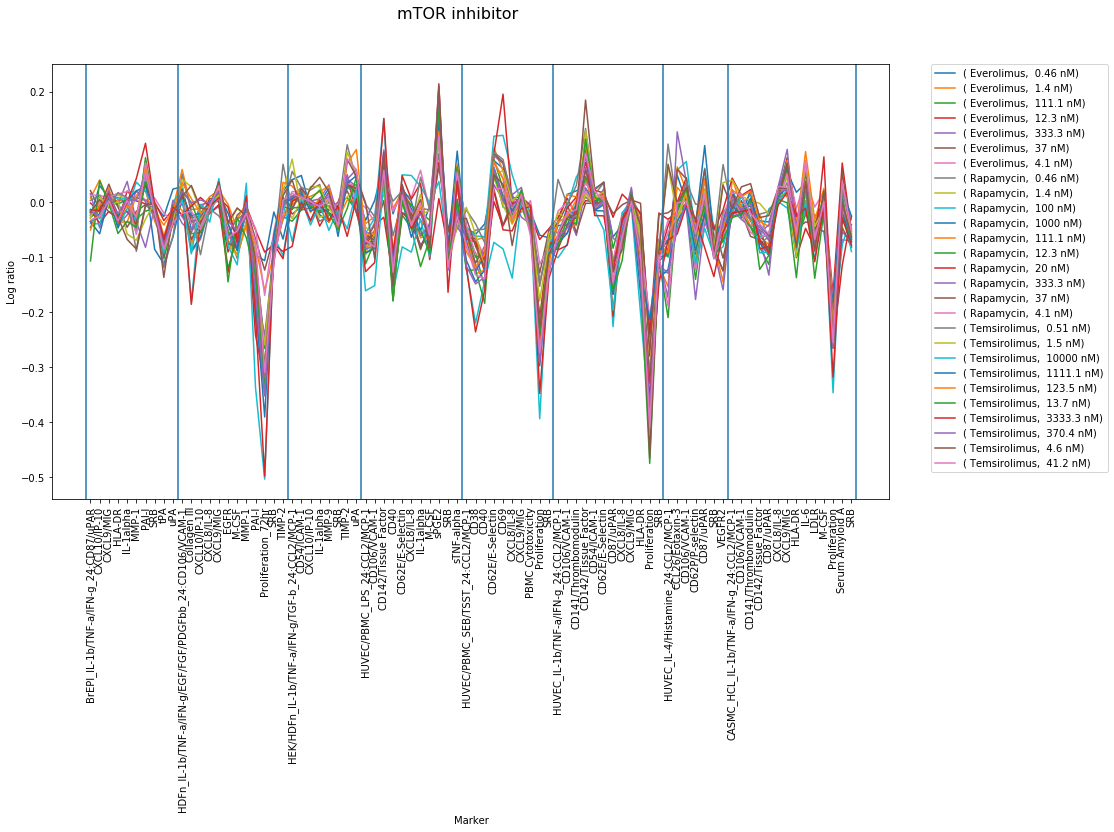

p38 MAPK inhibitor


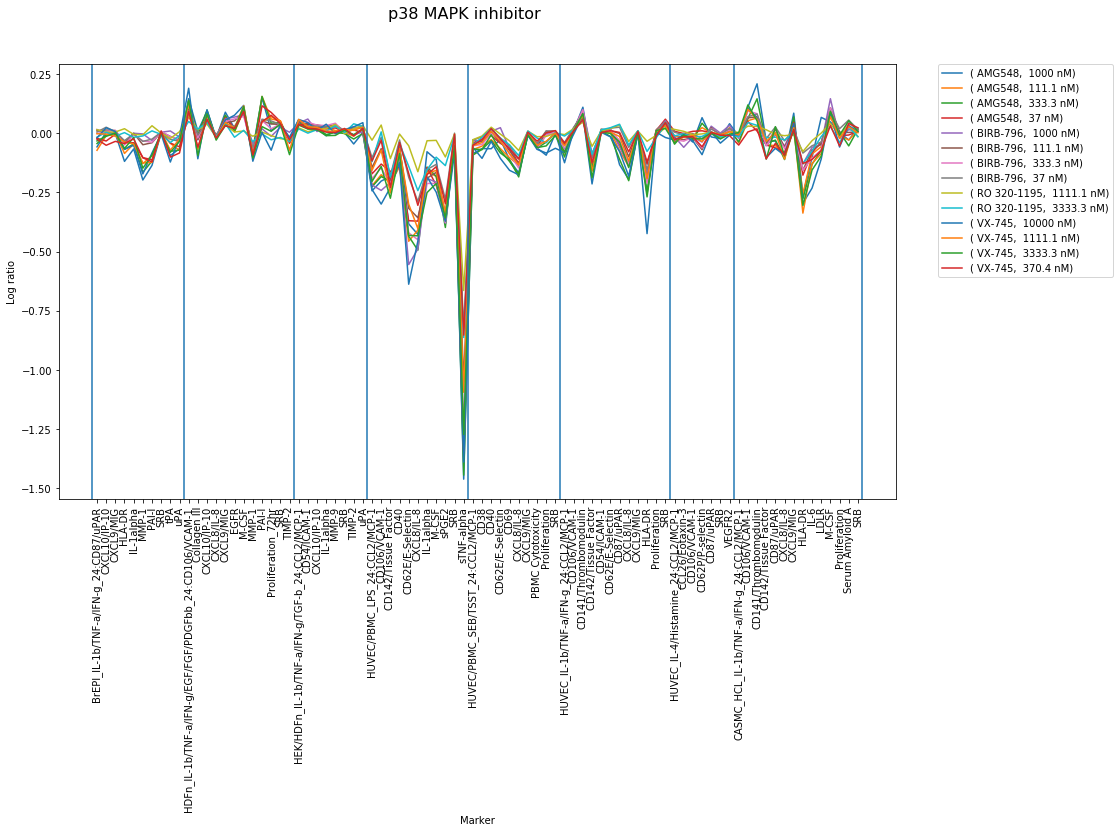

PDE IV inhibitor


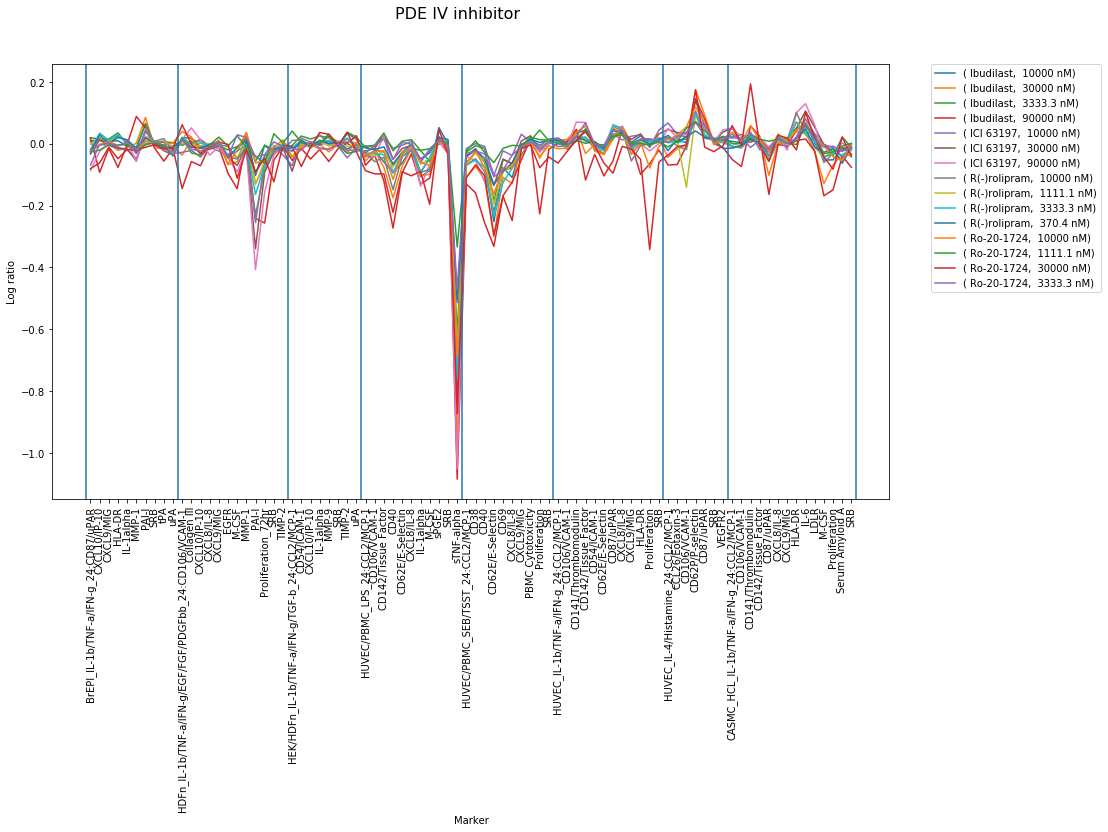

PI3K inhibitor


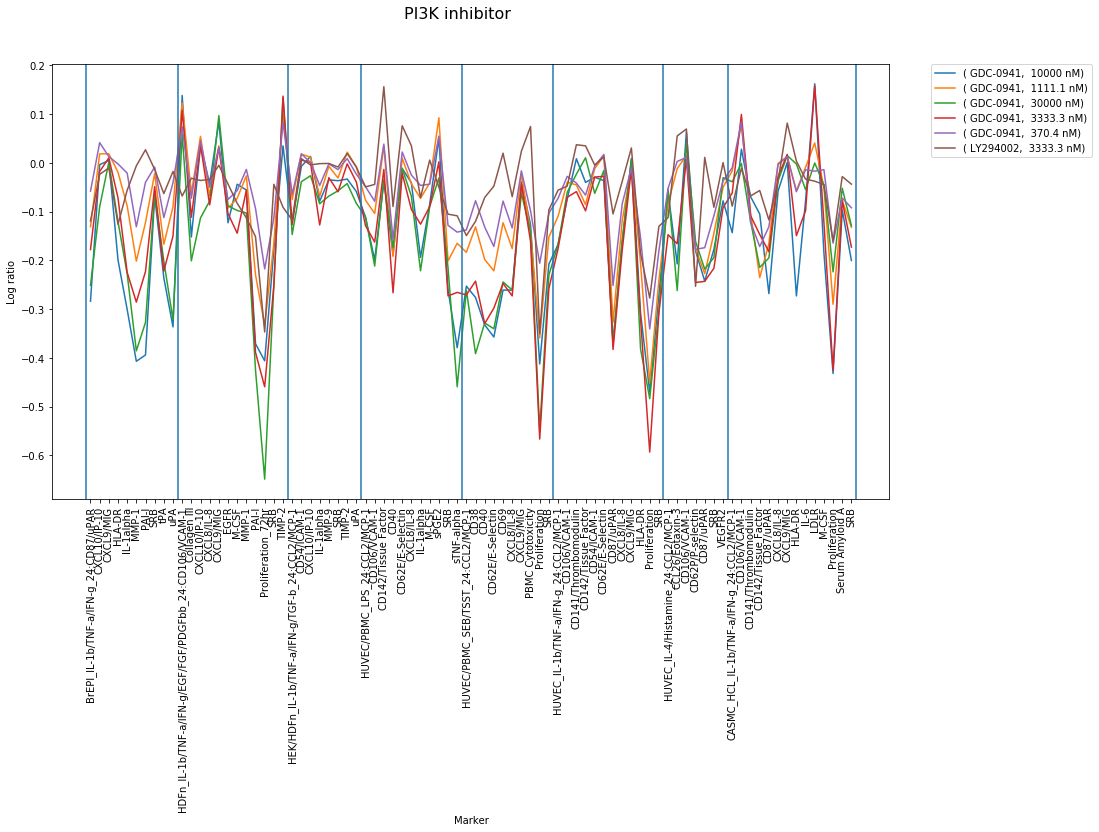

PKC (c+n) inhibitor


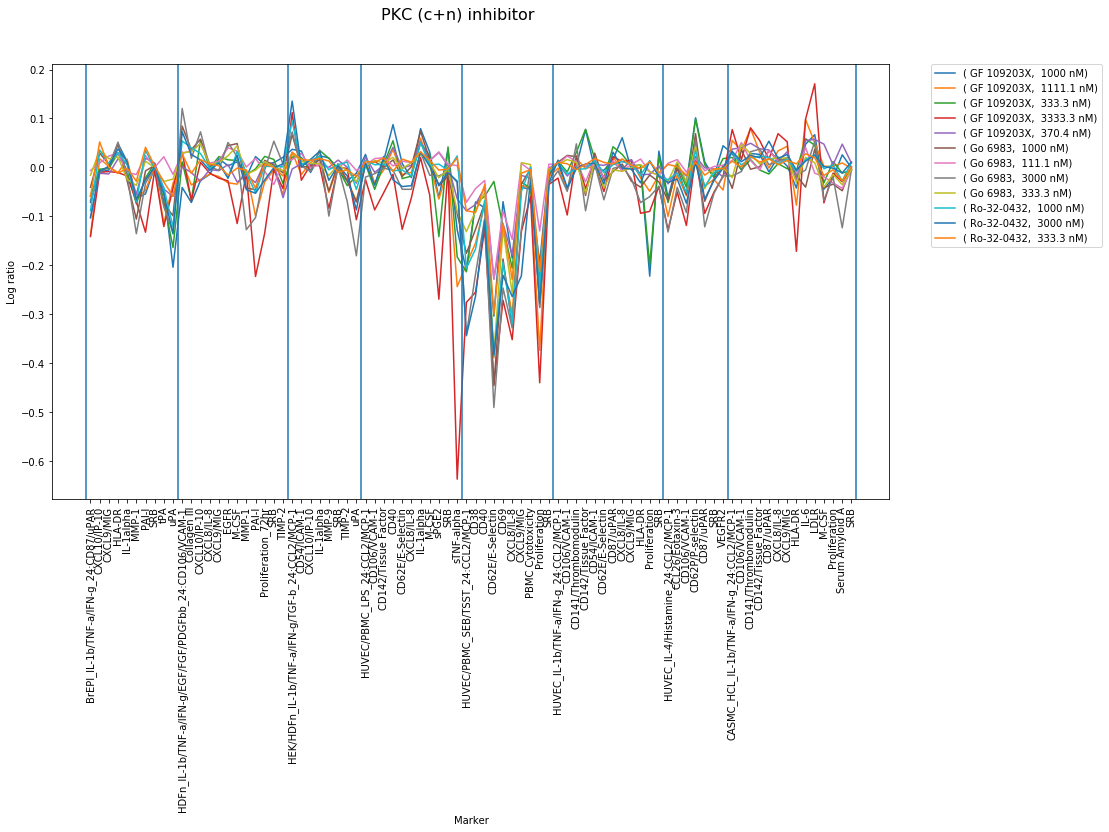

Proteasome inhibitor


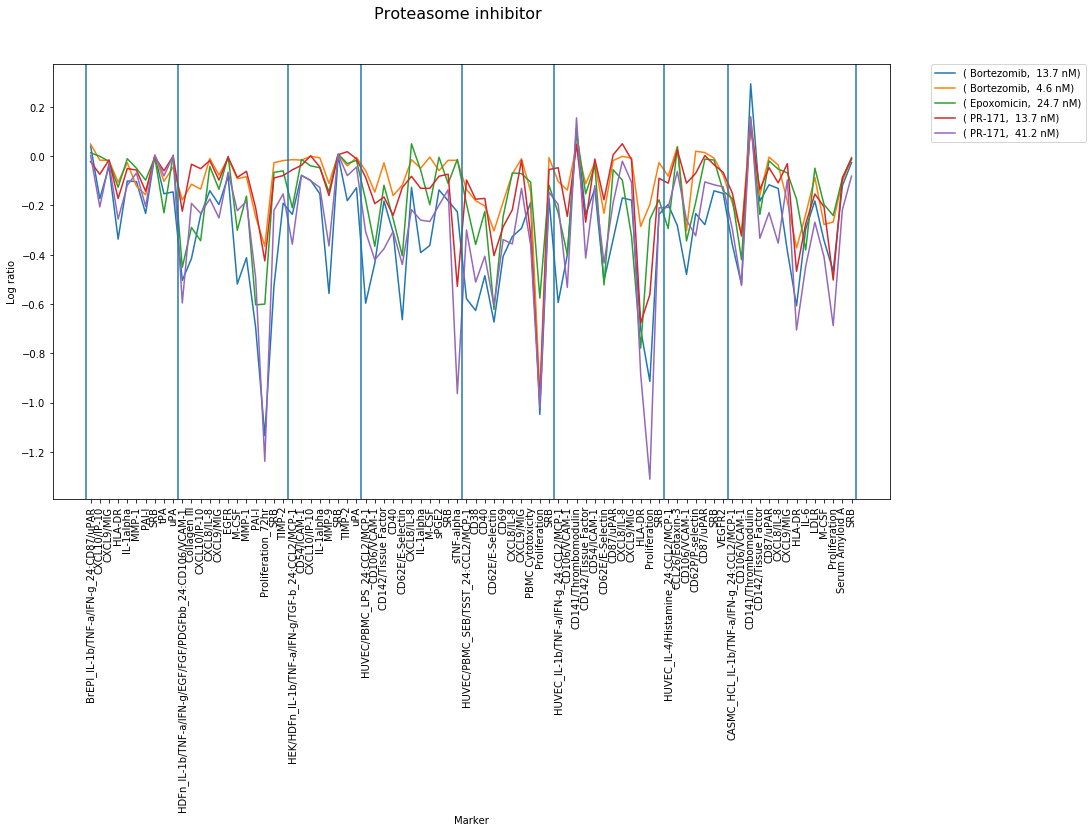

RAR/RXR agonist


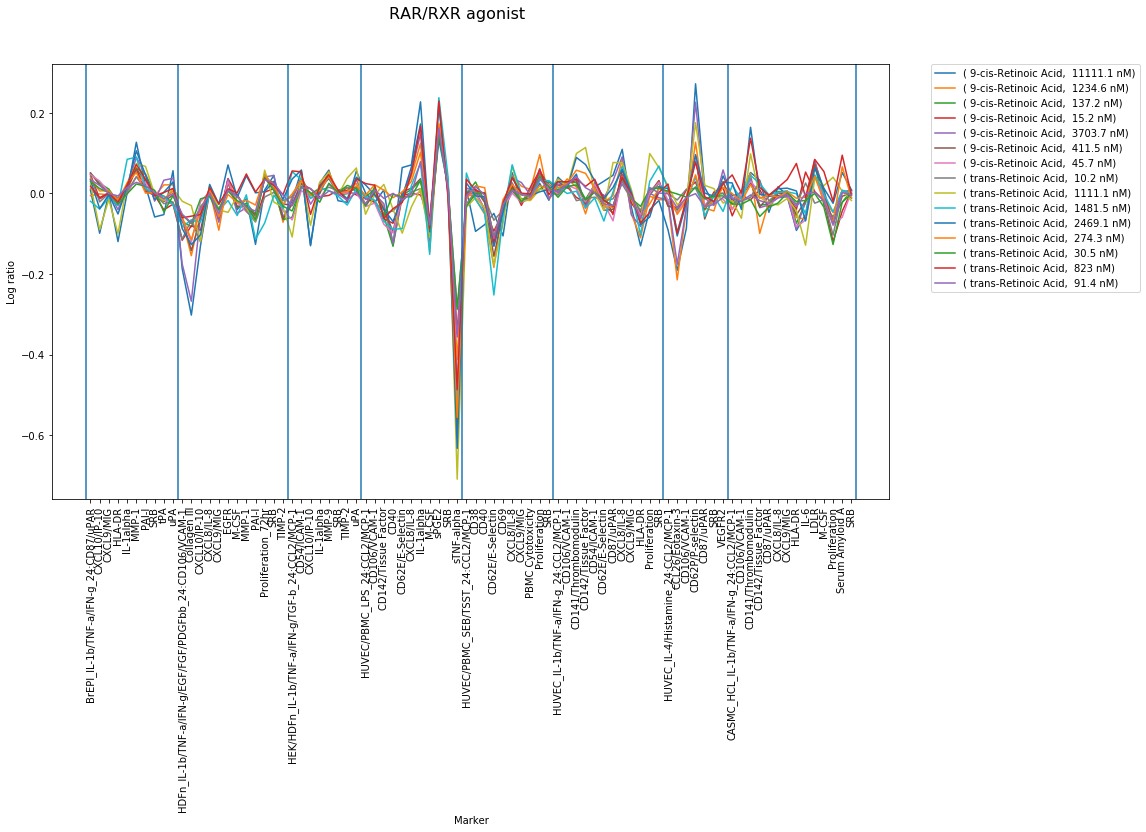

Src family inhibitor


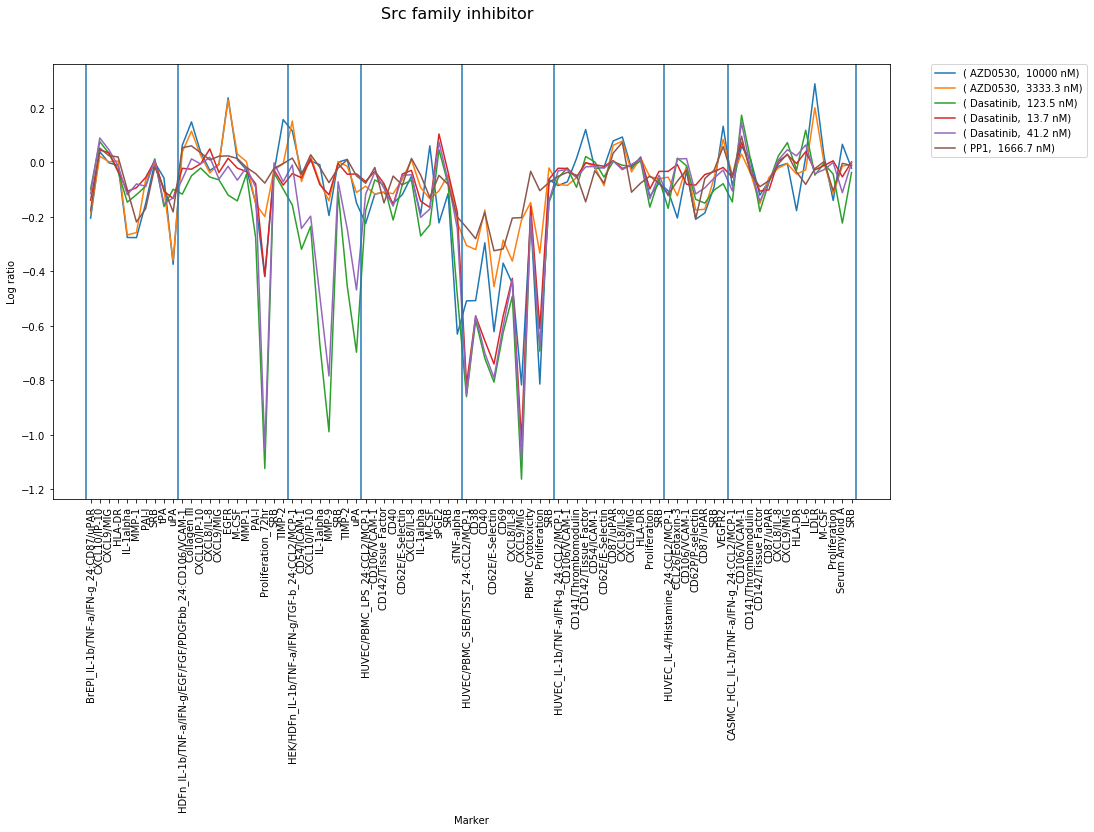

TNF-α antagonist


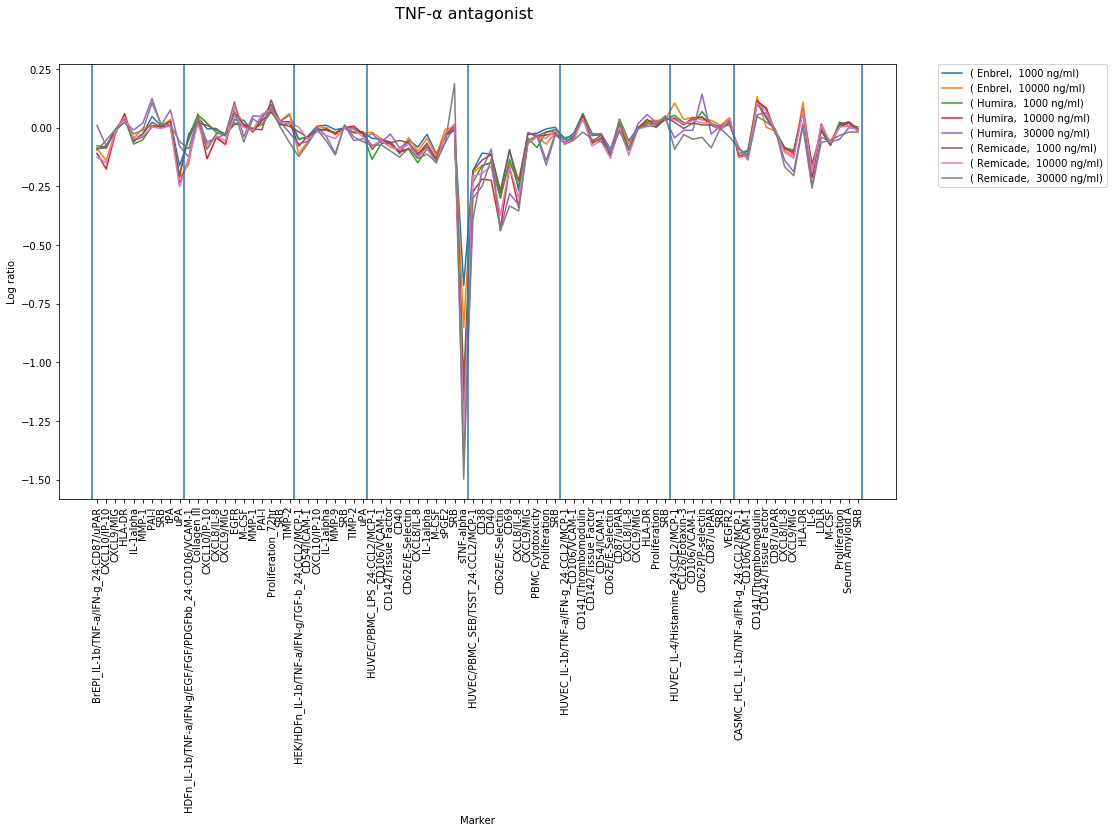

Vitamin D receptor agonist


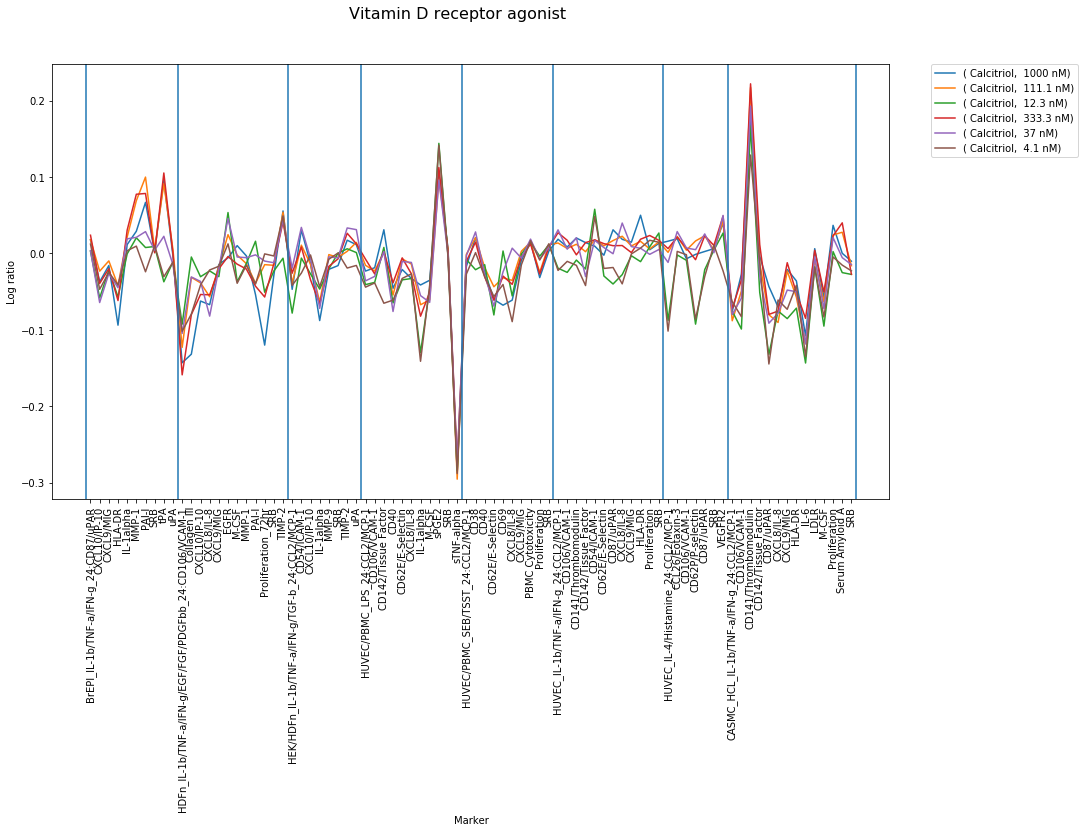

In [6]:
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 100

for mech in data.index.get_level_values(0).unique().values: # Plot all mechanisms
    print(mech)
    ax = data.loc[mech].T.plot(
        figsize=(15,8),
        sharey=True,
        subplots=False,
        x=data.columns.get_level_values(1));
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    x, x_labels, v_line_positions = pr.v_line_positions();
    plt.xticks(x, x_labels, rotation='vertical');
    plt.ylabel('Log ratio');
    plt.suptitle(mech, fontsize = 16)
    # add vertical lines
    for lp in v_line_positions:
        plt.axvline(x=lp-0.5)
    plt.show()
        

# Plot each profile on its own

In [ ]:

for mech in data.index.get_level_values(0).unique().values:
    ax = data.loc[mech].T.plot(
        figsize=(15, 30),
        sharey=True,
        subplots=True);

    [axn.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) for axn in ax];
    plt.xticks(x, x_labels, rotation='vertical');
    plt.ylabel('Log ratio');
    plt.suptitle(mech, size = 16);